In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating world

In [2]:
def create_world(width, higth):
    return np.zeros((higth, width))

def init_world(world, thresh):
    for index_y, value_y in enumerate(world):
        for index_x, value_x in enumerate(value_y):
            if index_x == 0 or index_x == world.shape[0] -1:
                world[index_y][index_x] = 1
            elif np.random.rand() < thresh:
                    world[index_y][index_x] = 1
    
    world[0] = 1
    world[-1] = 1
    return world           

def calculate_surrounding_pos(world):
    calculate_array = np.zeros(world.shape)
    for index_y, value_y in enumerate(calculate_array[1:-1]):
        for index_x, value_x in enumerate(value_y[1:-1]):
            array_index_x = index_x + 1
            array_index_y = index_y + 1
            count = world[array_index_y - 1][array_index_x - 1] + world[array_index_y - 1][array_index_x] + world[array_index_y - 1][array_index_x + 1] + \
                    world[array_index_y][array_index_x - 1]     + world[array_index_y][array_index_x]     + world[array_index_y][array_index_x + 1] + \
                    world[array_index_y + 1][array_index_x - 1] + world[array_index_y + 1][array_index_x] + world[array_index_y + 1][array_index_x + 1]
            
            calculate_array[array_index_y][array_index_x] = count
            
#             if index_x == 0 or index_x == world.shape[0] -1:
#                 world[index_y][index_x] = 1
                
#     calculate_array[0] = 1
#     calculate_array[-1] = 1
    return calculate_array

def update_world(world, step, birth_thresh, survival_thresh):
    for _ in range(step):
        calculate_alive = calculate_surrounding_pos(world)
        for index_y, value_y in enumerate(np.zeros(world.shape)[1:-1]):
            for index_x, value_x in enumerate(value_y[1:-1]):
                array_index_x = index_x + 1
                array_index_y = index_y + 1
                
                # Survival check
                if world[array_index_y][array_index_x] == 1:
                    if calculate_alive[array_index_y][array_index_x] < survival_thresh:
                        world[array_index_y][array_index_x] = 0
                    continue
                        
                # Birth check
                if world[array_index_y][array_index_x] == 0:
                    if calculate_alive[array_index_y][array_index_x] > birth_thresh:
                        world[array_index_y][array_index_x] = 1
                    continue
                        
    return world,calculate_alive

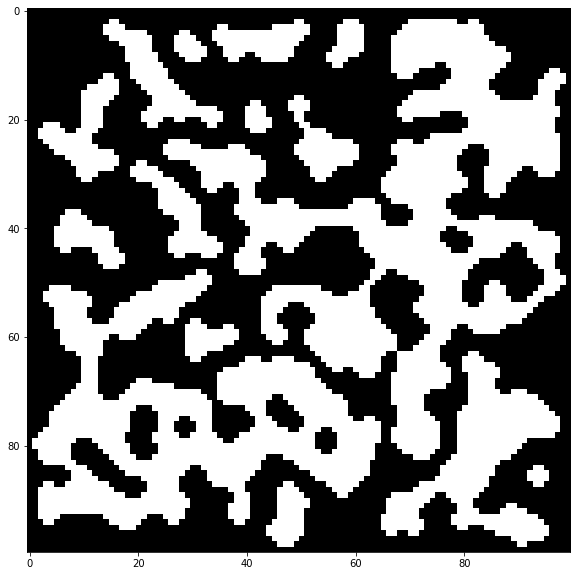

In [3]:
thresh = 0.5
world = create_world(100,100)
world = init_world(world,thresh)
# calculate_value = calculate_surrounding_pos(world)

# world = update_world(world, calculate_value, step = 30, birth_thresh= 5, survival_thresh =4)
# calculate_value = calculate_surrounding_pos(world)
# plt.imshow(world)
# plt.show()

# plt.figure(figsize=(10, 10))
# plt.imshow(world,cmap='binary')
# plt.show()

world, calculate_alive = update_world(world, step = 25, birth_thresh= 4, survival_thresh =5)
plt.figure(figsize=(10, 10))
plt.imshow(world,cmap='binary')
plt.show()

# Visualising

In [4]:
import os
from PIL import Image, ImageDraw
from pathlib import Path
import copy

In [5]:
# textures_path = 'D:\\git\\Procedural-Dungeon-Generation-Cellular-Automata\\assets\\debug_set\\'
# textures_path = 'D:\\git\\Procedural-Dungeon-Generation-Cellular-Automata\\assets\\fancy_tiles\\'
textures_path = 'D:\\git\\Procedural-Dungeon-Generation-Cellular-Automata\\assets\\fancy_tiles_2\\'

# Wall and floor textures

In [6]:
# Empty
wall_000000000 = Image.open(textures_path + "000000000.png")
wall_111111111 = Image.open(textures_path + "111111111.png")

# Center
wall_000010000 = Image.open(textures_path + "000010000.png")
wall_111101111 = copy.deepcopy(wall_000010000)

# 1 Corners
wall_000000001 = Image.open(textures_path + "000000001.png")
wall_000000100  =copy.deepcopy(wall_000000001).rotate(270) 
wall_001000000  =copy.deepcopy(wall_000000001).rotate(90) 
wall_100000000  =copy.deepcopy(wall_000000001).rotate(180) 

# 2 Corners
wall_101000000 = Image.open(textures_path + "101000000.png")
wall_001000001  = copy.deepcopy(wall_101000000).rotate(270)
wall_000000101  = copy.deepcopy(wall_101000000).rotate(180)
wall_100000100  = copy.deepcopy(wall_101000000).rotate(90)

# 2 Diagnals
wall_100000001 = Image.open(textures_path + "100000001.png")
wall_001000100 =copy.deepcopy(wall_100000001).rotate(90) 


# 3 Corners
wall_101000001 = Image.open(textures_path + "101000001.png")
wall_001000101  =copy.deepcopy(wall_101000001).rotate(270) 
wall_100000101  =copy.deepcopy(wall_101000001).rotate(180) 
wall_101000100  =copy.deepcopy(wall_101000001).rotate(90) 

# Strokes
wall_000000111 = Image.open(textures_path + "000000111.png")
wall_001001001  =copy.deepcopy(wall_000000111).rotate(90) 
wall_111000000  =copy.deepcopy(wall_000000111).rotate(180) 
wall_100100100  =copy.deepcopy(wall_000000111).rotate(270) 

# Partial Strokes
wall_000000011 = copy.deepcopy(wall_000000111)
wall_000000110 = copy.deepcopy(wall_000000111)
wall_000000010 = copy.deepcopy(wall_000000111)

wall_000001001  =copy.deepcopy(wall_001001001)
wall_001001000  =copy.deepcopy(wall_001001001)
wall_000001000  =copy.deepcopy(wall_001001001)

wall_011000000  =copy.deepcopy(wall_111000000)
wall_110000000  =copy.deepcopy(wall_111000000)
wall_010000000  =copy.deepcopy(wall_111000000)

wall_000100100  =copy.deepcopy(wall_100100100)
wall_100100000  =copy.deepcopy(wall_100100100)
wall_000100000  =copy.deepcopy(wall_100100100)

# Turns
wall_110100000 = Image.open(textures_path + "110100000.png")
wall_011001000 =copy.deepcopy(wall_110100000).rotate(270) 
wall_000100110 =copy.deepcopy(wall_110100000).rotate(90) 
wall_000001011 =copy.deepcopy(wall_110100000).rotate(180)

# All but 1 corner
wall_111111110 = Image.open(textures_path + "111111110.png")
wall_110111111  =copy.deepcopy(wall_111111110).rotate(90) 
wall_011111111  =copy.deepcopy(wall_111111110).rotate(180) 
wall_111111011  =copy.deepcopy(wall_111111110).rotate(270) 

# All but 1+1 corner right
wall_111111100 = Image.open(textures_path + "111111100.png")
wall_110110111  =copy.deepcopy(wall_111111100).rotate(90) 
wall_001111111  =copy.deepcopy(wall_111111100).rotate(180) 
wall_111011011  =copy.deepcopy(wall_111111100).rotate(270) 

# All but 1+1 corner left
wall_111111001 = Image.open(textures_path + "111111001.png")
wall_111110110  =copy.deepcopy(wall_111111001).rotate(90) 
wall_100111111  =copy.deepcopy(wall_111111001).rotate(180) 
wall_011011111  =copy.deepcopy(wall_111111001).rotate(270) 

# Tri corner
wall_111011001 = Image.open(textures_path + "111011001.png")
wall_111110100  =copy.deepcopy(wall_111011001).rotate(90) 
wall_100110111  =copy.deepcopy(wall_111011001).rotate(180) 
wall_001011111  =copy.deepcopy(wall_111011001).rotate(270) 

# Tetris Inverted-L
wall_111100000 = Image.open(textures_path + "111100000.png")
wall_100100110  =copy.deepcopy(wall_111100000).rotate(90) 
wall_000001111  =copy.deepcopy(wall_111100000).rotate(180) 
wall_011001001  =copy.deepcopy(wall_111100000).rotate(270) 

# Stroke wall
wall_111111000 = Image.open(textures_path + "111111000.png")
wall_110110110  =copy.deepcopy(wall_111111000).rotate(90) 
wall_000111111  =copy.deepcopy(wall_111111000).rotate(180) 
wall_011011011  =copy.deepcopy(wall_111111000).rotate(270) 

# Tetris L
wall_111001000 = Image.open(textures_path + "111001000.png")
wall_110100100  =copy.deepcopy(wall_111001000).rotate(90) 
wall_000100111  =copy.deepcopy(wall_111001000).rotate(180) 
wall_001001011  =copy.deepcopy(wall_111001000).rotate(270) 
     
# P blok
wall_011011001 = Image.open(textures_path + "011011001.png")
wall_111110000  =copy.deepcopy(wall_011011001).rotate(90) 
wall_100110110  =copy.deepcopy(wall_011011001).rotate(180) 
wall_000011111  =copy.deepcopy(wall_011011001).rotate(270) 

# Q blok
wall_110110100 = Image.open(textures_path + "110110100.png")
wall_000110111  =copy.deepcopy(wall_110110100).rotate(90) 
wall_001011011  =copy.deepcopy(wall_110110100).rotate(180) 
wall_111011000  =copy.deepcopy(wall_110110100).rotate(270) 

# Thick dash
wall_110111011 = Image.open(textures_path + "110111011.png")
wall_011111110  =copy.deepcopy(wall_110111011).rotate(90) 

# 2 to 1 opposing
wall_100100001 = Image.open(textures_path + "100100001.png")
wall_001000011  =copy.deepcopy(wall_100100001).rotate(90) 
wall_100001001  =copy.deepcopy(wall_100100001).rotate(180) 
wall_011000100  =copy.deepcopy(wall_100100001).rotate(270) 

# Glider shape 
wall_110100001 = Image.open(textures_path + "110100001.png")
wall_001100110  =copy.deepcopy(wall_110100001).rotate(90) 
wall_100001011  =copy.deepcopy(wall_110100001).rotate(180) 
wall_011001100  =copy.deepcopy(wall_110100001).rotate(270) 

# Passage short
wall_000100101 = Image.open(textures_path + "000100101.png")
wall_001000011  =copy.deepcopy(wall_000100101).rotate(90) 
wall_101001000  =copy.deepcopy(wall_000100101).rotate(180) 
wall_110000100 =copy.deepcopy(wall_000100101).rotate(270) 

# 2 to 1 opposing inverted
wall_001001100 = Image.open(textures_path + "001001100.png")
wall_100000011  =copy.deepcopy(wall_001001100).rotate(90) 
wall_001001100  =copy.deepcopy(wall_001001100).rotate(180) 
wall_011000001 =copy.deepcopy(wall_001001100).rotate(270) 

# Z shape with hole
wall_100101001 = Image.open(textures_path + "100101001.png")
wall_011000110  =copy.deepcopy(wall_100101001).rotate(90) 

# Broken Glider shape
wall_001100100 = Image.open(textures_path + "001100100.png")
wall_100000011  =copy.deepcopy(wall_001100100).rotate(90) 
wall_001001100  =copy.deepcopy(wall_001100100).rotate(180) 
wall_110000001 =copy.deepcopy(wall_001100100).rotate(270) 

# Stroke wall with oposing
wall_101001001 = Image.open(textures_path + "101001001.png")
wall_111000100  =copy.deepcopy(wall_101001001).rotate(90) 
wall_100100101  =copy.deepcopy(wall_101001001).rotate(180) 
wall_001000111 =copy.deepcopy(wall_101001001).rotate(270) 

# Plug patern
wall_110111110 = Image.open(textures_path + "110111110.png")
wall_010111111  =copy.deepcopy(wall_110111110).rotate(90) 
wall_011111011  =copy.deepcopy(wall_110111110).rotate(180) 
wall_111111010 =copy.deepcopy(wall_110111110).rotate(270) 

# Long T shape
wall_100111100 = Image.open(textures_path + "100111100.png")
wall_010010111  =copy.deepcopy(wall_100111100).rotate(90) 
wall_001111001  =copy.deepcopy(wall_100111100).rotate(180) 
wall_111010010 =copy.deepcopy(wall_100111100).rotate(270)

# Wool spin
wall_110110011 = Image.open(textures_path + "110110011.png")
wall_001111110  =copy.deepcopy(wall_110110011).rotate(90) 
wall_110011011  =copy.deepcopy(wall_110110011).rotate(180) 
wall_011111100 =copy.deepcopy(wall_110110011).rotate(270)

# Inv broken glider
wall_001000110 = Image.open(textures_path + "001000110.png")
wall_100001001  =copy.deepcopy(wall_001000110).rotate(90) 
wall_011000100  =copy.deepcopy(wall_001000110).rotate(180) 
wall_100100001 =copy.deepcopy(wall_001000110).rotate(270)


# Missing Textures
missing_texture = Image.open(textures_path + "missing.png")

# Walls only

In [7]:
# Empty
wall_000000000 = Image.open(textures_path + "000000000.png")
wall_111111111 = Image.open(textures_path + "111111111.png")

# Center
wall_000010000 = Image.open(textures_path + "000010000.png")
wall_111101111 = copy.deepcopy(wall_000010000)

# 1 Corners
wall_000000001 = Image.open(textures_path + "000000001.png")
wall_000000100  =copy.deepcopy(wall_000000001)
wall_001000000  =copy.deepcopy(wall_000000001) 
wall_100000000  =copy.deepcopy(wall_000000001)

# 2 Corners
wall_101000000 = Image.open(textures_path + "101000000.png")
wall_001000001  = copy.deepcopy(wall_101000000)
wall_000000101  = copy.deepcopy(wall_101000000)
wall_100000100  = copy.deepcopy(wall_101000000)

# 2 Diagnals
wall_100000001 = Image.open(textures_path + "100000001.png")
wall_001000100 =copy.deepcopy(wall_100000001)


# 3 Corners
wall_101000001 = Image.open(textures_path + "101000001.png")
wall_001000101  =copy.deepcopy(wall_101000001)
wall_100000101  =copy.deepcopy(wall_101000001) 
wall_101000100  =copy.deepcopy(wall_101000001) 

# Strokes
wall_000000111 = Image.open(textures_path + "000000111.png")
wall_001001001  =copy.deepcopy(wall_000000111) 
wall_111000000  =copy.deepcopy(wall_000000111) 
wall_100100100  =copy.deepcopy(wall_000000111)

# Partial Strokes
wall_000000011 = copy.deepcopy(wall_000000111)
wall_000000110 = copy.deepcopy(wall_000000111)
wall_000000010 = copy.deepcopy(wall_000000111)

wall_000001001  =copy.deepcopy(wall_001001001)
wall_001001000  =copy.deepcopy(wall_001001001)
wall_000001000  =copy.deepcopy(wall_001001001)

wall_011000000  =copy.deepcopy(wall_111000000)
wall_110000000  =copy.deepcopy(wall_111000000)
wall_010000000  =copy.deepcopy(wall_111000000)

wall_000100100  =copy.deepcopy(wall_100100100)
wall_100100000  =copy.deepcopy(wall_100100100)
wall_000100000  =copy.deepcopy(wall_100100100)

# Turns
wall_110100000 = Image.open(textures_path + "110100000.png")
wall_011001000 =copy.deepcopy(wall_110100000) 
wall_000100110 =copy.deepcopy(wall_110100000) 
wall_000001011 =copy.deepcopy(wall_110100000)

# All but 1 corner
wall_111111110 = Image.open(textures_path + "111111110.png")
wall_110111111  =copy.deepcopy(wall_111111110).rotate(90) 
wall_011111111  =copy.deepcopy(wall_111111110).rotate(180) 
wall_111111011  =copy.deepcopy(wall_111111110).rotate(270) 

# All but 1+1 corner right
wall_111111100 = Image.open(textures_path + "111111100.png")
wall_110110111  =copy.deepcopy(wall_111111100).rotate(90) 
wall_001111111  =copy.deepcopy(wall_111111100).rotate(180) 
wall_111011011  =copy.deepcopy(wall_111111100).rotate(270) 

# All but 1+1 corner left
wall_111111001 = Image.open(textures_path + "111111001.png")
wall_111110110  =copy.deepcopy(wall_111111001).rotate(90) 
wall_100111111  =copy.deepcopy(wall_111111001).rotate(180) 
wall_011011111  =copy.deepcopy(wall_111111001).rotate(270) 

# Tri corner
wall_111011001 = Image.open(textures_path + "111011001.png")
wall_111110100  =copy.deepcopy(wall_111011001).rotate(90) 
wall_100110111  =copy.deepcopy(wall_111011001).rotate(180) 
wall_001011111  =copy.deepcopy(wall_111011001).rotate(270) 

# Tetris Inverted-L
wall_111100000 = Image.open(textures_path + "111100000.png")
wall_100100110  =copy.deepcopy(wall_111100000)
wall_000001111  =copy.deepcopy(wall_111100000)
wall_011001001  =copy.deepcopy(wall_111100000) 

# Stroke wall
wall_111111000 = Image.open(textures_path + "111111000.png")
wall_110110110  =copy.deepcopy(wall_111111000).rotate(90) 
wall_000111111  =copy.deepcopy(wall_111111000).rotate(180) 
wall_011011011  =copy.deepcopy(wall_111111000).rotate(270) 

# Tetris L
wall_111001000 = Image.open(textures_path + "111001000.png")
wall_110100100  =copy.deepcopy(wall_111001000)
wall_000100111  =copy.deepcopy(wall_111001000)
wall_001001011  =copy.deepcopy(wall_111001000) 

# P blok
wall_011011001 = Image.open(textures_path + "011011001.png")
wall_111110000  =copy.deepcopy(wall_011011001).rotate(90) 
wall_100110110  =copy.deepcopy(wall_011011001).rotate(180) 
wall_000011111  =copy.deepcopy(wall_011011001).rotate(270) 

# Q blok
wall_110110100 = Image.open(textures_path + "110110100.png")
wall_000110111  =copy.deepcopy(wall_110110100).rotate(90) 
wall_001011011  =copy.deepcopy(wall_110110100).rotate(180) 
wall_111011000  =copy.deepcopy(wall_110110100).rotate(270) 

# Thick dash
wall_110111011 = Image.open(textures_path + "110111011.png")
wall_011111110  =copy.deepcopy(wall_110111011).rotate(90) 

# 2 to 1 opposing
wall_100100001 = Image.open(textures_path + "100100001.png")
wall_001000011  =copy.deepcopy(wall_100100001) 
wall_100001001  =copy.deepcopy(wall_100100001)
wall_011000100  =copy.deepcopy(wall_100100001) 

# Glider shape 
wall_110100001 = Image.open(textures_path + "110100001.png")
wall_001100110  =copy.deepcopy(wall_110100001)
wall_100001011  =copy.deepcopy(wall_110100001)
wall_011001100  =copy.deepcopy(wall_110100001) 

# Passage short
wall_000100101 = Image.open(textures_path + "000100101.png")
wall_001000011  =copy.deepcopy(wall_000100101) 
wall_101001000  =copy.deepcopy(wall_000100101) 
wall_110000100 =copy.deepcopy(wall_000100101) 

# 2 to 1 opposing inverted
wall_001001100 = Image.open(textures_path + "001001100.png")
wall_100000011  =copy.deepcopy(wall_001001100)
wall_001001100  =copy.deepcopy(wall_001001100)
wall_011000001 =copy.deepcopy(wall_001001100)

# Z shape with hole
wall_100101001 = Image.open(textures_path + "100101001.png")
wall_011000110  =copy.deepcopy(wall_100101001)

# Broken Glider shape
wall_001100100 = Image.open(textures_path + "001100100.png")
wall_100000011  =copy.deepcopy(wall_001100100)
wall_001001100  =copy.deepcopy(wall_001100100) 
wall_110000001 =copy.deepcopy(wall_001100100) 

# Stroke wall with oposing
wall_101001001 = Image.open(textures_path + "101001001.png")
wall_111000100  =copy.deepcopy(wall_101001001) 
wall_100100101  =copy.deepcopy(wall_101001001)
wall_001000111 =copy.deepcopy(wall_101001001)

# Plug patern
wall_110111110 = Image.open(textures_path + "110111110.png")
wall_010111111  =copy.deepcopy(wall_110111110).rotate(90) 
wall_011111011  =copy.deepcopy(wall_110111110).rotate(180) 
wall_111111010 =copy.deepcopy(wall_110111110).rotate(270) 

# Long T shape
wall_100111100 = Image.open(textures_path + "100111100.png")
wall_010010111  =copy.deepcopy(wall_100111100).rotate(90) 
wall_001111001  =copy.deepcopy(wall_100111100).rotate(180) 
wall_111010010 =copy.deepcopy(wall_100111100).rotate(270)

# Wool spin
wall_110110011 = Image.open(textures_path + "110110011.png")
wall_001111110  =copy.deepcopy(wall_110110011).rotate(90) 
wall_110011011  =copy.deepcopy(wall_110110011).rotate(180) 
wall_011111100 =copy.deepcopy(wall_110110011).rotate(270)

# Inv broken glider
wall_001000110 = Image.open(textures_path + "001000110.png")
wall_100001001  =copy.deepcopy(wall_001000110)
wall_011000100  =copy.deepcopy(wall_001000110)
wall_100100001 =copy.deepcopy(wall_001000110)


# Missing Textures
missing_texture = Image.open(textures_path + "missing.png")

'001000110': wall_001000110,
'100001001': wall_100001001,
'011000100': wall_011000100,
'100100001': wall_100100001,    

In [8]:
texture_dict = {'000000000': wall_000000000,
                '111111111': wall_111111111,
                '000010000': wall_000010000,
                '111101111': wall_111101111,
                '000000001': wall_000000001,
                '000000100': wall_000000100,
                '001000000': wall_001000000,
                '100000000': wall_100000000,
                '101000000': wall_101000000,
                '001000001': wall_001000001,
                '000000101': wall_000000101,
                '100000100': wall_100000100,
                '100000001': wall_100000001,
                '001000100': wall_001000100,
                '101000001': wall_101000001,
                '001000101': wall_001000101,
                '100000101': wall_100000101,
                '101000100': wall_101000100,
                '000000111': wall_000000111,
                '001001001': wall_001001001,
                '111000000': wall_111000000,
                '100100100': wall_100100100,
                '000000011': wall_000000011,
                '000000110': wall_000000110,
                '000000010': wall_000000010,
                '000001001': wall_000001001,
                '001001000': wall_001001000,
                '000001000': wall_000001000,
                '011000000': wall_011000000,
                '110000000': wall_110000000,
                '010000000': wall_010000000,
                '000100100': wall_000100100,
                '100100000': wall_100100000,
                '000100000': wall_000100000,
                '110100000': wall_110100000,
                '011001000': wall_011001000,
                '000100110': wall_000100110,
                '000001011': wall_000001011,
                '111111110': wall_111111110,
                '110111111': wall_110111111,
                '011111111': wall_011111111,
                '111111011': wall_111111011,
                '111111100': wall_111111100,
                '110110111': wall_110110111,
                '001111111': wall_001111111,
                '111011011': wall_111011011,
                '111111001': wall_111111001,
                '111110110': wall_111110110,
                '100111111': wall_100111111,
                '011011111': wall_011011111,
                '111011001': wall_111011001,
                '111110100': wall_111110100,
                '100110111': wall_100110111,
                '001011111': wall_001011111,
                '111100000': wall_111100000,
#                 '000011011': wall_000011011,
#                 '011011000': wall_011011000,
                '111001000': wall_111001000,
                '110100100': wall_110100100,
                '000100111': wall_000100111,
                '001001011': wall_001001011,
                '111111000': wall_111111000,
                '110110110': wall_110110110,
                '000111111': wall_000111111,
                '011011011': wall_011011011,
                '011001001': wall_011001001,
                '111100000': wall_111100000,
                '100100110': wall_100100110,
                '000001111': wall_000001111,
                '011011001': wall_011011001,
                '111110000': wall_111110000,
                '100110110': wall_100110110,
                '000011111': wall_000011111,
                '110110100': wall_110110100,
                '000110111': wall_000110111,
                '001011011': wall_001011011,
                '111011000': wall_111011000,
                '110111011': wall_110111011,
                '011111110': wall_011111110,
                '100100001': wall_100100001,
                '001000011': wall_001000011,
                '100001001': wall_100001001,
                '011000100': wall_011000100,
                '110100001': wall_110100001,
                '001100110': wall_001100110,
                '100001011': wall_100001011,
                '011001100': wall_011001100,
                '000100101': wall_000100101,
                '001000011': wall_001000011,
                '101001000': wall_101001000,
                '110000100': wall_110000100,
                '001001100': wall_001001100,
                '100000011': wall_100000011,
                '001001100': wall_001001100,
                '011000001': wall_011000001,
                '100101001': wall_100101001,
                '011000110': wall_011000110,
                '001100100': wall_001100100,
                '100000011': wall_100000011,
                '001001100': wall_001001100,
                '110000001': wall_110000001,
                '101001001': wall_101001001,
                '111000100': wall_111000100,
                '100100101': wall_100100101,
                '001000111': wall_001000111,
                '110111110': wall_110111110,
                '010111111': wall_010111111,
                '011111011': wall_011111011,
                '111111010': wall_111111010,
                '100111100': wall_100111100,
                '010010111': wall_010010111,
                '001111001': wall_001111001,
                '111010010': wall_111010010,
                '110110011': wall_110110011,
                '001111110': wall_001111110,
                '110011011': wall_110011011,
                '011111100': wall_011111100,
                '001000110': wall_001000110,
                '100001001': wall_100001001,
                '011000100': wall_011000100,
                '100100001': wall_100100001,  
                'missing_texture': missing_texture}

# Process world to textures

In [9]:
def determin_texture_pos(world):
    calculate_array = np.zeros(world.shape).astype(str)
    max_height, max_width,  = calculate_array.shape
    max_height += -1
    max_width += -1
    world = world.astype(int)
    for index_y, value_y in enumerate(calculate_array):
        for index_x, value_x in enumerate(value_y):
            texture_ind = str(world[max(index_y - 1, 0)][max(index_x - 1, 0)]) + str(world[max(index_y - 1, 0)][index_x]) + str(world[max(index_y - 1, 0)][min(index_x + 1, max_width)]) + \
                    str(world[index_y][max(index_x - 1, 0)])                   + str(world[index_y][index_x])     + str(world[index_y][min(index_x + 1, max_width)]) + \
                    str(world[min(index_y + 1, max_height)][max(index_x - 1, 0)]) + str(world[min(index_y + 1, max_height)][index_x]) + str(world[min(index_y + 1, max_height)][min(index_x + 1, max_width)])
            
            calculate_array[index_y][index_x] = texture_ind
            
    return calculate_array.astype(str)

In [10]:
texture_world = determin_texture_pos(world)

world.shape[0]

In [11]:
# Get width and height of the walls
tile_size_width, tile_size_height = wall_000000000.size

# Calculate canvas size of the maze
width = world.shape[0] * tile_size_width
height = world.shape[1] * tile_size_height

# Get maze grind size
maze_width, maze_height = world.shape

# Create canvas
background = Image.new(mode="RGB", size=(height, width))

In [12]:
counter ={}

for height_row, value_y in enumerate(texture_world):
        for index, value_x in enumerate(value_y):
            if texture_world[height_row][index] in texture_dict:
                texture = texture_dict[str(texture_world[height_row][index])]
            else:
                texture = texture_dict['missing_texture']
                if texture_world[height_row][index] not in counter:
                    counter[texture_world[height_row][index]] = 1
                else:
                    counter[texture_world[height_row][index]] += 1
            background.paste(texture, (index * tile_size_width, height_row * tile_size_height), texture)

In [13]:
texture_world[0][0]

'111111111'

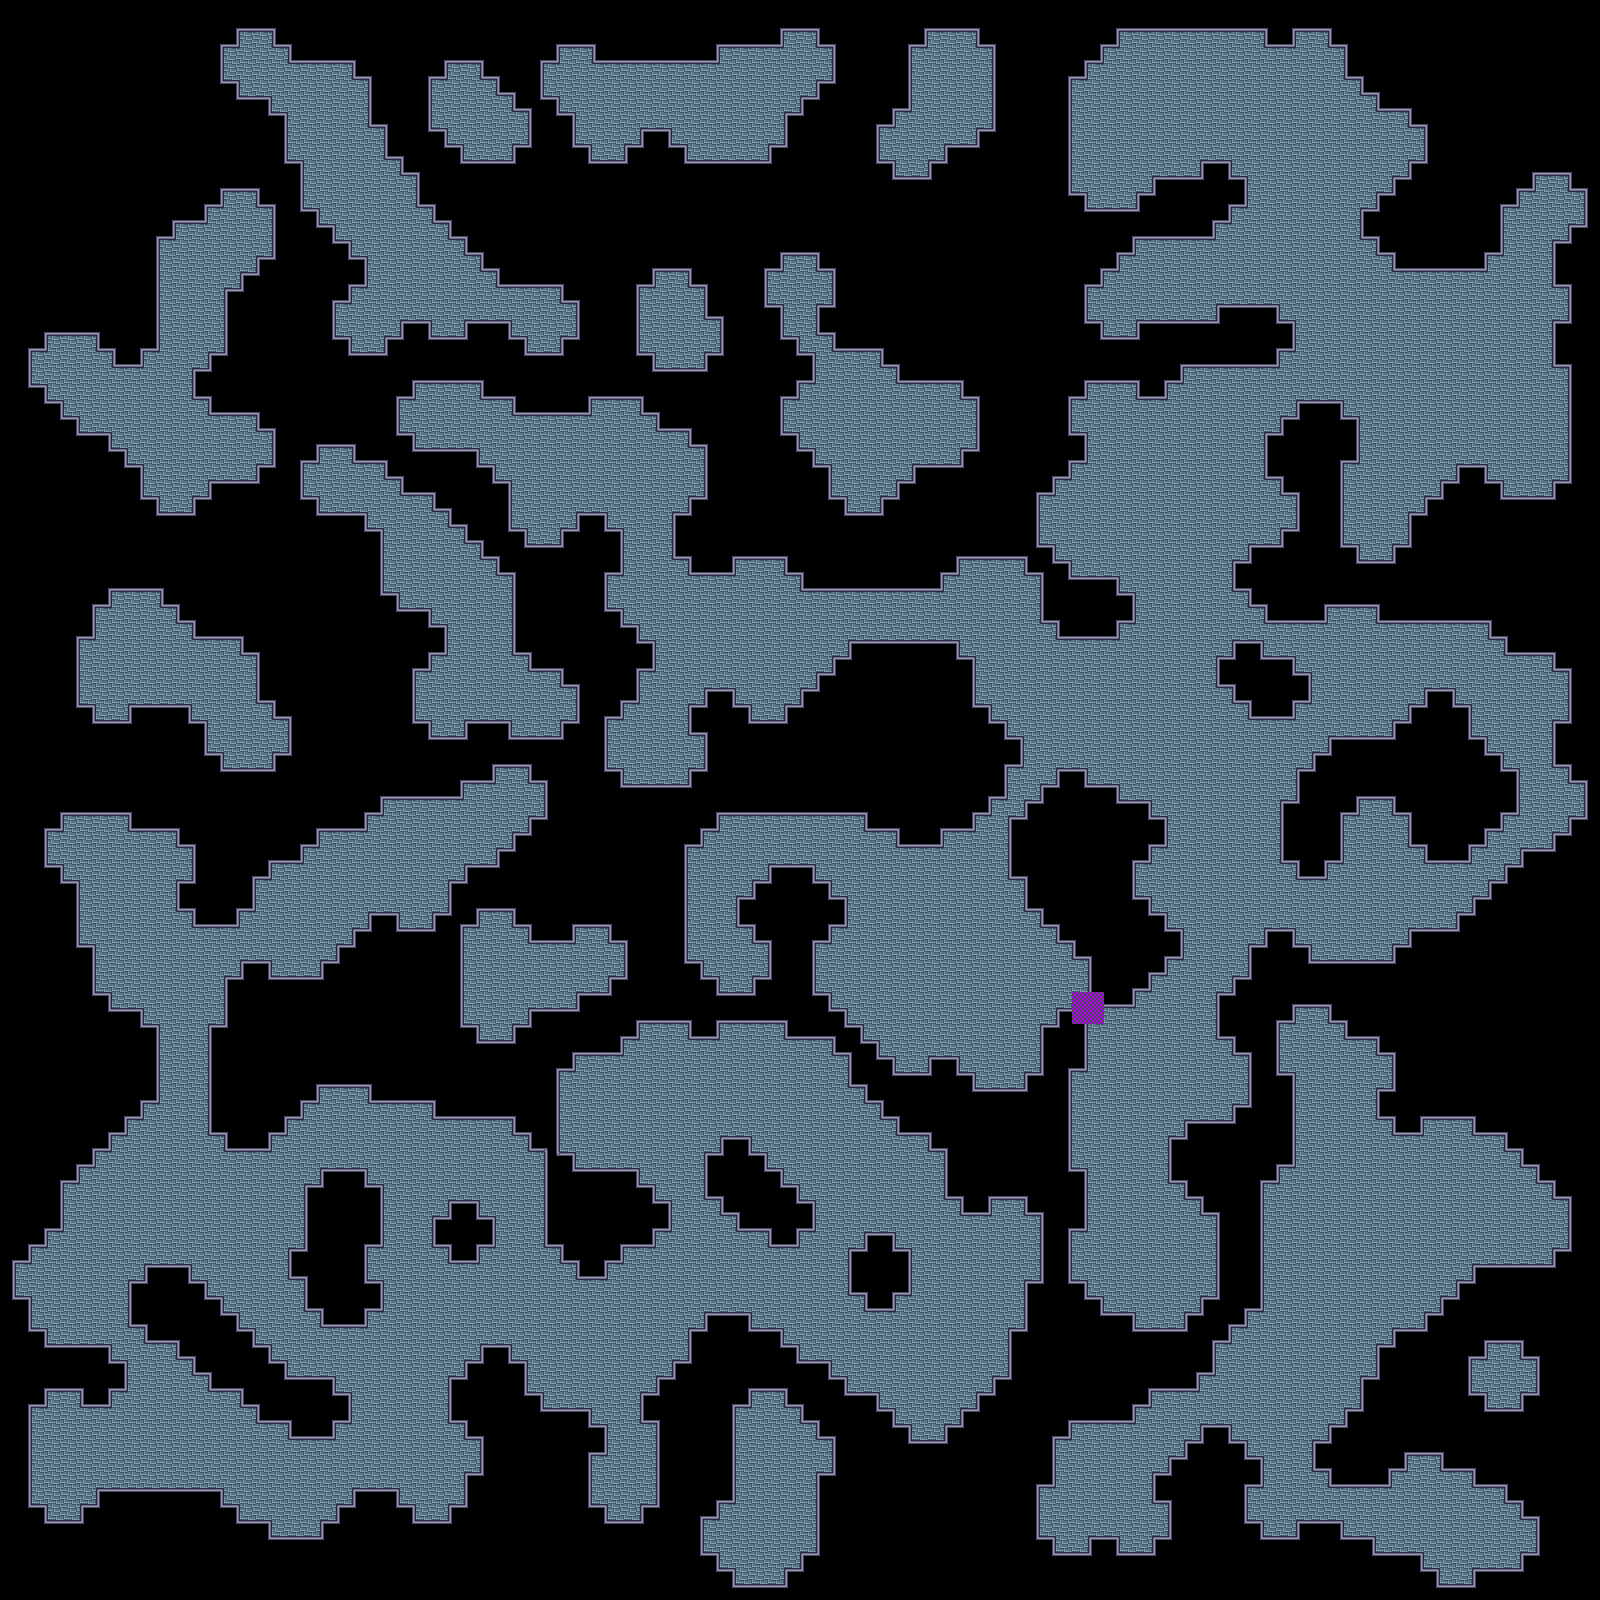

In [14]:
background

In [15]:
len(counter)

4

In [16]:
counter

{'001001110': 1, '011011100': 1, '001110110': 1, '011100100': 1}

In [17]:
len(texture_dict)

112

wall_001000100